# Projet IA, TEST 1: 4*4 cells ❤

##### Made with ❤ By Zineb & Oumayma :) 
##### Filière : e_MBI ❤
_2021.2022_

![gg](https://lh3.googleusercontent.com/proxy/wocSvtvi-53nqUC-CDaryub_970XJlDolxxvvhJa5HDewc9Tg8VZc4G5teJ84GPevp4Dwd6pLHQlfQUAQCfON_s2ac6qiC4)

#### Etapes de Construction :



_Dataset utilisé : MNIST_
> **📌Traitement de l'image : thinning line, 4 bords de l'image, resize de l'image**

> **📌Feature Extraction :  chaque image représente 16 blocs, chaque bloc a trois features, chaque feature est représenté par un seul neuronne donc input = 48 neuronnes en entrée**

> **📌Build The NN 🧠**


![gg](https://lh3.googleusercontent.com/proxy/wocSvtvi-53nqUC-CDaryub_970XJlDolxxvvhJa5HDewc9Tg8VZc4G5teJ84GPevp4Dwd6pLHQlfQUAQCfON_s2ac6qiC4)

### Importation Des Librairies ✔

In [1]:
# Importer torch
import skimage 
from skimage import morphology
import torch
import skimage
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from sklearn.linear_model import LinearRegression
from skimage import transform as tf
from sklearn.model_selection import train_test_split


### Récupération des données ✔

In [2]:
# Récupérer les données d'apprentissage
data1_train=datasets.MNIST(root='./data',train=True,download=True)


In [3]:
# Récupérer les données de test
data1_test=datasets.MNIST(root='datatest',train=False,download=True)

### Visualisation des données ✔

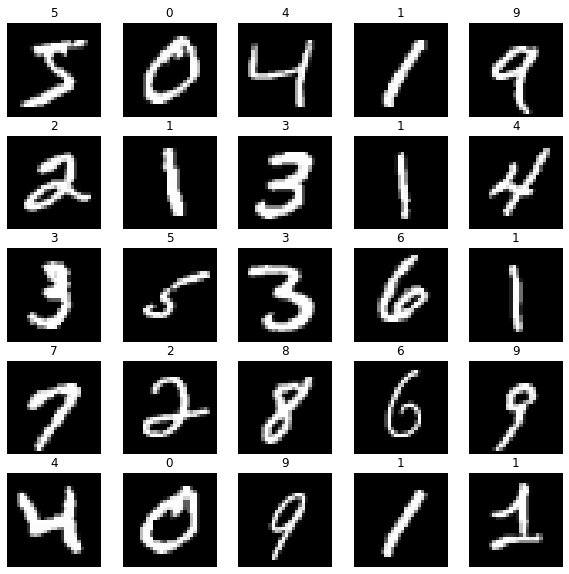

In [4]:
#affichage des images avec leurs labels
figure=plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    image=data1_train[i][0]
    plt.title(data1_train[i][1])
    plt.imshow(image,interpolation='none',cmap='gray')
    plt.gray()
    plt.axis('off')

![gg](https://lh3.googleusercontent.com/proxy/wocSvtvi-53nqUC-CDaryub_970XJlDolxxvvhJa5HDewc9Tg8VZc4G5teJ84GPevp4Dwd6pLHQlfQUAQCfON_s2ac6qiC4)

## Traitement de l'image ❤


### 1. thinning line ✔

In [199]:

def binaire(img) :
        i,k=0,0
        g=np.array(img)
        for i in range(0,28):
            
            for k in range(0,28):
              
                if g[i][k]!=0 :
                    
                    g[i][k]=1
                
        return g

In [197]:

def thin(img):
    data_train_bin=binaire(img)
    data_train_skl = skimage.morphology.skeletonize(data_train_bin)
    data_train_thin= skimage.morphology.thin(data_train_skl , max_iter=3)
    return data_train_thin

_Before Thinning_

torch.Size([28, 28])

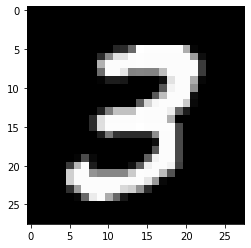

In [15]:
img=data1_train.data[7]
plt.imshow(img, cmap="gray")
img.shape

_After Thinning_

(28, 28)

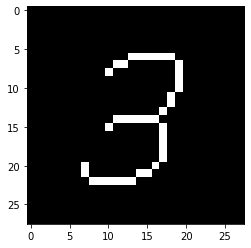

In [200]:
#testing
img=data1_train.data[7]
img=thin(img)
plt.imshow(img, cmap="gray")
img.shape

### 2. Les bords de l'image ✔

In [195]:
def crop(img):
    img=thin(img)
    img= img[~np.all(img == 0, axis=1)]
    img=np.transpose(img)
    img= img[~np.all(img== 0, axis=1)]
    img=np.transpose(img)
    img= tf.resize(img, (28, 28), order=0)
    return img

(28, 28)


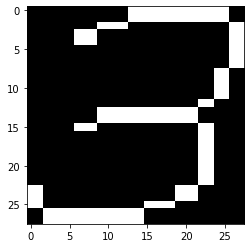

In [201]:
#testing
b=crop(data1_train.data[7])
print(b.shape)
plt.imshow(b, cmap="gray")

## Feature Extraction ❤

![gg](https://lh3.googleusercontent.com/proxy/wocSvtvi-53nqUC-CDaryub_970XJlDolxxvvhJa5HDewc9Tg8VZc4G5teJ84GPevp4Dwd6pLHQlfQUAQCfON_s2ac6qiC4)

### 1. Découpage en 16 blocs ✔

In [329]:
def split(img):
    img=thin(img)
    #split into blocks of (7*7)
    block=[]
    [row, col]=img.shape
    for i in range (0, row, 7):
        for j in range(0, col, 7):
            block.append(img[i:i+7, j:j+7])
    return block

_affichage des 16 blocks d'une image_

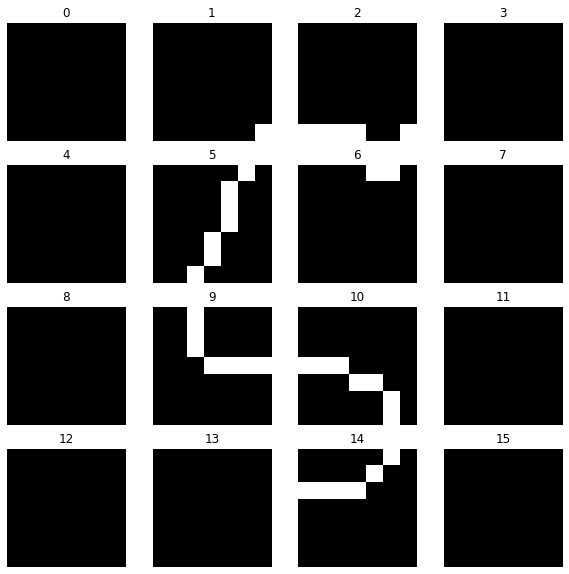

In [324]:
#affichage des images avec leurs labels
figure=plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    image=block[i]
    plt.title(i)
    plt.imshow(image,cmap='gray')
    plt.gray()
    plt.axis('off')

_Zoomant un peu plus sur un block_ 😍

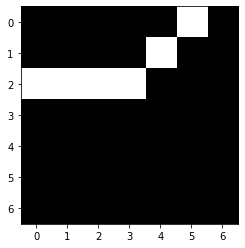

In [325]:
#testing crop
img=data1_train.data[2000]
block=split(img)
plt.imshow(block[14], cmap="gray")

### 2. Récupération des features ( Régression lineaire)

_linear regression to fit straight lines to curve lines_

_From the Paper : "SIMPLE AND EFFECTIVE FEATURE EXTRACTION FOR OPTICAL CHARACTER RECOGNITION"_
![bb](bb.png)
![aa](aa.png)

#### Feature 1 ✔

In [207]:
def total_noir(img) :
        i,k=0,0
        g=crop(img)
        total=0
        for i in range(0,28):
            
            for k in range(0,28):
              
                if g[i][k]!=0 :
                    
                    total=total+1
                
        return total

In [208]:
c=total_noir(data1_train.data[12])


### Local Line Fitting
_From the Paper : "SIMPLE AND EFFECTIVE FEATURE EXTRACTION FOR OPTICAL CHARACTER RECOGNITION"_

![cc](cc.png)

In [209]:
#coordonnées des points noirs de chaque bloc
def coord(img,k):
    block=split(img)
    g=block[k]
    X=[]
    Y=[]
    i,j=0,0
    for i in range(0,7):
        for j in range(0,7):
            if g[i][j]!=0 :
                Y.append(i)
                X.append(j)
            
    return [X,Y]

In [214]:
coord(data1_train.data[2000],4)

[[], []]

In [327]:
        #tesing
        M=[[5, 6, 2, 3, 4, 2, 3, 4, 2, 3, 4, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6]]
        X=np.array(M)[0].reshape((-1, 1))
        Y=np.array(M)[1]
        reg = LinearRegression().fit(X,Y)
        b=reg.coef_
        print(b)

[-0.8972912]


In [14]:
data1_train.targets[59999]

tensor(8)

### Récupération du slope b 🏷

#### Feature 2 & 3 ✔

In [331]:
#Récupération des 3 features
def features(img,k) : 
    
    liste=[]
    block=split(img)
    g=block[k]
    M=coord(img,k)
    c=total_noir(img)
    S=0
    i,j=0,0
    if M[0]==[] and M[1]==[] :
        liste=[0,0,1]
    else:
        
        X=np.array(M)[0].reshape((-1, 1))
        Y=np.array(M)[1]
        reg = LinearRegression().fit(X,Y)
        b=reg.coef_
        
        for i in range(0,7):
            for j in range(0,7):
                if g[i][j]!=0 :
                    S=S+1
        liste.append(float((1-b**2)/(1+b**2))) #feature3
        liste.append(float((2*b)/(1+b**2))) #feature2
        liste.append(S/total_noir(img)) #feature 1
   
    return liste


In [18]:
features(data1_train.data[2000],4)


[0.8098005877796296, -0.586705213912205, 0.09397590361445783]

#### Feature Extraction de chaque image ✔

In [19]:
def feature_image(img):
    i=0
    j=0
    F= []
    
    for j in range(16):
            F= F + features(img,j)
    
            
    return F

In [20]:
torch.tensor(feature_image(data1_train.data[5]))
print(data1_train.targets[5])

tensor(2)


![gg](https://lh3.googleusercontent.com/proxy/wocSvtvi-53nqUC-CDaryub_970XJlDolxxvvhJa5HDewc9Tg8VZc4G5teJ84GPevp4Dwd6pLHQlfQUAQCfON_s2ac6qiC4)

# Build The NN 🧠

![gg](https://lh3.googleusercontent.com/proxy/wocSvtvi-53nqUC-CDaryub_970XJlDolxxvvhJa5HDewc9Tg8VZc4G5teJ84GPevp4Dwd6pLHQlfQUAQCfON_s2ac6qiC4)

## Préparation de l'environnement de notre NN :

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split


### Our New Dataset ❤

### Splitting pour train, test et validation ✔


In [332]:
# Création de tensors en résultat du splitting: données d'apprentissage, données de validation, labels d'apprentissage, et labels de validation  
train_data, validation_data, train_targets, validation_targets = train_test_split(data1_train.data, data1_train.targets, test_size=10000)
# Récupération les labels de test à partir de votre sous-dataset de test
test_data = data1_test.data
test_targets = data1_test.targets
# Affichage la taille de chaque tensor
print(train_data.shape, train_targets.shape)
print(validation_data.shape, validation_targets.shape)
print(test_targets.shape)

torch.Size([50000, 28, 28]) torch.Size([50000])
torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([10000])


###  Normalisation des données ✔

In [23]:
# Convertir les valeurs des tensors en float
train_data = train_data.float()
test_data = test_data.float()
validation_data = validation_data.float()
# Stocker dans des variables la moyenne et la déviation standard des données d'apprentissage 
mean_train = torch.mean(train_data)
std_train = torch.std(train_data)
# Normaliser les données d'apprentissage, de test, et de validation par ces valeurs
train_data = (train_data - mean_train)/std_train
test_data = (test_data - mean_train)/std_train
validation_data = (validation_data - mean_train)/std_train
# Afficher la moyenne et la déviation standard de chaque dataset
print(train_data.mean(), train_data.std())
print(test_data.mean(),test_data.std())
print(validation_data.mean(), validation_data.std())

tensor(3.4379e-08) tensor(1.0000)
tensor(0.0062) tensor(1.0080)
tensor(0.0013) tensor(1.0018)


### Création de Pytorch Dataset ✔

In [24]:
%%time
# Importer Dataset de torch.utils.data
from torch.utils.data import Dataset
    

Wall time: 0 ns


In [47]:

# Créer une classe qui hérite de Dataset et redéfinit les méthodes comme susmentionné
class MyDataset(Dataset):
    def __init__(self, data, targets):
        super(MyDataset, self)
        self.data=[]
        self.targets=[]
        for i in range(60000):
            self.data.append(torch.tensor(feature_image(data1_train.data[i])))
            self.targets.append( data1_train.targets[i])
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    def __len__(self):
        return len(self.targets)

In [48]:
%%time
train_dataset = MyDataset(train_data, train_targets)
test_dataset = MyDataset(test_data, test_targets)
validation_dataset = MyDataset(validation_data, validation_targets)

Wall time: 5h 43min 27s


In [510]:
print(train_dataset.data[5].shape)
print(train_dataset.targets[5])
print(train_dataset.data[5])


torch.Size([48])
tensor(2)
tensor([ 1.0000e+00,  0.0000e+00,  5.0761e-03,  9.3606e-01, -3.5183e-01,
         7.3604e-02,  9.9518e-01,  9.8112e-02,  1.1929e-01,  1.0000e+00,
         0.0000e+00,  1.0152e-02,  1.0000e+00,  0.0000e+00,  1.0152e-02,
         8.1272e-01,  5.8266e-01,  7.1066e-02,  8.6875e-01, -4.9525e-01,
         8.8832e-02,  1.0000e+00,  0.0000e+00,  1.7766e-02,  7.9681e-01,
        -6.0424e-01,  6.0914e-02,  9.9829e-01,  5.8425e-02,  1.0660e-01,
         1.0000e+00, -6.0076e-17,  1.2183e-01,  8.5002e-01,  5.2674e-01,
         5.3299e-02,  1.0000e+00, -1.5460e-17,  1.2437e-01,  9.0787e-01,
        -4.1926e-01,  8.6294e-02,  9.8969e-01, -1.4326e-01,  1.7766e-02,
         9.9757e-01,  6.9683e-02,  3.2995e-02])


In [511]:
print(data1_train.data[5].shape)
print(data1_train.targets[5])
print(data1_train.data[5])


torch.Size([28, 28])
tensor(2)
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,  

In [702]:
# Importer DataLoader de torch.utils.data
from torch.utils.data import DataLoader

In [703]:
# Créer une variable pour la taille du batch
batch_size = 64

In [704]:
# Créer les objets DataLoader pour les datasets d'apprentissage, test et validation en lui donner la taille du batch convenue

train_DL = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_DL = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
validation_DL = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

In [705]:
from sklearn import datasets
#import pandas as pd 

#df = pd.DataFrame(data=train_DL)
#df.to_csv('validation_dataset.csv', sep = ',', index = False)

In [706]:
# Importer le module nn
import torch.nn as nn

![gg](https://lh3.googleusercontent.com/proxy/wocSvtvi-53nqUC-CDaryub_970XJlDolxxvvhJa5HDewc9Tg8VZc4G5teJ84GPevp4Dwd6pLHQlfQUAQCfON_s2ac6qiC4)

In [946]:
import torch.nn.functional as F
# En utilisant Sequential(), créer un modèle avec l'architecture susmentionnée
# Créer une classe qui hérite de nn.Module et redéfinir le constructeur ainsi que la méthode forward
class Net (nn.Module):
    def __init__ (self):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(48, 200)
        nn.BatchNorm1d(20)
        nn.Dropout(0.5)
        self.fc2 = nn.Linear(200, 100)
        nn.BatchNorm1d(20)
        nn.Dropout(0.5)
        self.fc4= nn.Linear(100, 20)
        nn.BatchNorm1d(20)
        nn.Dropout(0.5)
        self.fc5= nn.Linear(20, 20)
        nn.BatchNorm1d(20)
        nn.Dropout(0.5)
        self.fc3= nn.Linear(20, 10)

    def forward(self, x):
        x = F.selu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.selu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc3(x)
        return x

In [947]:
model= Net()
model

Net(
  (fc1): Linear(in_features=48, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=20, bias=True)
  (fc5): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)

In [948]:
# Définir la fonction du coût. On peut choisir CrossEntropyLoss
loss_function = nn.CrossEntropyLoss()

In [949]:
# Définir une fonction d'optimisation des coût, On choisira 0.001 pour le learning rate.
import torch.optim as optim
#optimizer = optim.Adadelta(model.parameters(), lr=100)
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [950]:
x=[]
y=[]

In [996]:
# Définir le nombre d'epochs. Commencer petit. 
epoch = 2

In [997]:
for ep in range(epoch):
    
    train_loss = 0
    
    for data in train_DL:
        feature,label= data
        
        output = model(torch.flatten(feature, start_dim=1))
        
        loss = loss_function(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        train_loss +=  loss.item() #it's a tensor
    
    train_loss /= len(train_DL)
        

    # boucle de validation:
    valid_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
         for data in validation_DL:
                feature, label = data

                output = model(feature.view(-1, 48))

                loss = loss_function(output, label)
                valid_loss +=  loss.item()

                correct += torch.sum(torch.argmax(output, dim=1) == label).item()

    valid_loss /= len(validation_DL)
    correct /= len(validation_DL.dataset) #10.000

    print(f"epoch: {ep}, train loss: {train_loss:.4f}, validation loss: {valid_loss:.4f}, correct predictions: {correct*100:.2f}%")

epoch: 0, train loss: 0.1238, validation loss: 0.1063, correct predictions: 96.39%
epoch: 1, train loss: 0.1215, validation loss: 0.1002, correct predictions: 96.59%


In [998]:
test_loss = 0
correct = 0

with torch.no_grad():
    
    for data in validation_DL:
        feature, label = data
        
        output = model(feature.view(-1, 48))
        
        loss = loss_function (output, label)
        test_loss += loss.item()
        
        correct += torch.sum(torch.argmax(output, dim=1) == label).item()
        

    test_loss /= len(test_DL)
    correct /= len(test_DL.dataset) #10.000  

print(f"Accuracy {correct*100:.2f}%")

Accuracy 96.59%


![gg](https://lh3.googleusercontent.com/proxy/wocSvtvi-53nqUC-CDaryub_970XJlDolxxvvhJa5HDewc9Tg8VZc4G5teJ84GPevp4Dwd6pLHQlfQUAQCfON_s2ac6qiC4)

### Résultats des expériences menées ✔

![gg](https://lh3.googleusercontent.com/proxy/wocSvtvi-53nqUC-CDaryub_970XJlDolxxvvhJa5HDewc9Tg8VZc4G5teJ84GPevp4Dwd6pLHQlfQUAQCfON_s2ac6qiC4)

In [999]:

x.append(epoch)
y.append(correct*100)
y

[81.99499999999999,
 87.37666666666667,
 89.78833333333334,
 92.755,
 94.55833333333334,
 94.79166666666666,
 96.58333333333333,
 96.595]

In [1000]:
x

[1, 2, 3, 10, 12, 14, 16, 2]

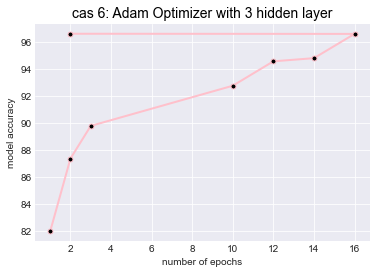

In [1001]:
import matplotlib.pyplot as plt 
  

# plotting the points  
plt.plot(x, y, color='pink', linestyle='-', linewidth = 2, 
         marker='o', markerfacecolor='black', markersize=5) 
  
  
# naming the x axis 
plt.xlabel('number of epochs') 
# naming the y axis 
plt.ylabel('model accuracy') 


# giving a title to my graph 
plt.title('cas 6: Adam Optimizer with 3 hidden layer',fontsize=14, fontweight=0, color='black') 
  
# function to show the plot 
plt.show() 

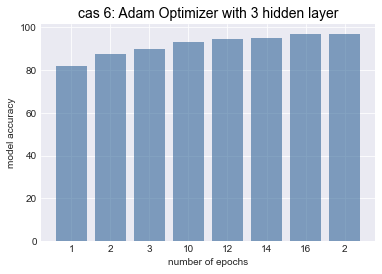

In [1004]:
y_pos=np.arange(len(x))
plt.bar(y_pos, y, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos, x)
plt.title('cas 6: Adam Optimizer with 3 hidden layer',fontsize=14, fontweight=0, color='black') 
plt.xlabel('number of epochs') 
# naming the y axis 
plt.ylabel('model accuracy') 
plt.show()


In [1006]:
torch.argmax(model(train_dataset.data[7]))

tensor(3)

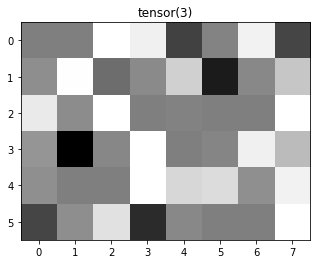

In [606]:
import matplotlib.pyplot as plt
plt.imshow(feature[0].view(6,8))
plt.title(torch.argmax(model(feature[10].view(-1, 48))))
plt.show()

In [607]:
data1_train.targets[10]

tensor(3)

In [1005]:
torch.save(model.state_dict(),"model_final_cas6.pth")

In [489]:
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss}, "modeltest.pth")

In [490]:
from pickle import dump
from sklearn.preprocessing import MinMaxScaler
# save the model
dump(model, open('modeltest.pkl', 'wb'))


# Fin ❤